In [114]:
# IMPORTS
from helper import merge_dataframes
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
file1_path = 'data/NewYorkCars/New_York_cars_part1.csv'
file2_path = 'data/NewYorkCars/New_York_cars_part2.csv'


df = merge_dataframes(file1_path, file2_path)

In [116]:
columns = df.columns
# ['new&used', 'name', 'money', 'Exterior color', 'Interior color','Drivetrain', 'MPG', 'Fuel type', 'Transmission', 'Engine', 'Mileage',
# 'Convenience', 'Entertainment', 'Exterior', 'Safety', 'Seating','Accidents or damage', 'Clean title', '1-owner vehicle','Personal use only',
#  'brand', 'Year', 'Model', 'currency']

## Add Costum Columns
# Add Age Column
max_year_value = df['Year'].max()
df['Age'] = max_year_value - df['Year']

# Change Column Money to int
df['money'] = df['money'].astype(str)

# Remove the decimal point from the values and store them as integers
df['money'] = df['money'].str.replace('.', '', regex=False).astype(int)

In [117]:
numbers_in_name = df['name'].str[:4].astype(int)

mismatched_values = df.loc[numbers_in_name != df['Year'], ['name', 'Year']]

if not mismatched_values.empty:
    print("Nicht übereinstimmende Werte:")
    print(mismatched_values)
else:
    print("Keine nicht übereinstimmenden Werte gefunden.")

Keine nicht übereinstimmenden Werte gefunden.


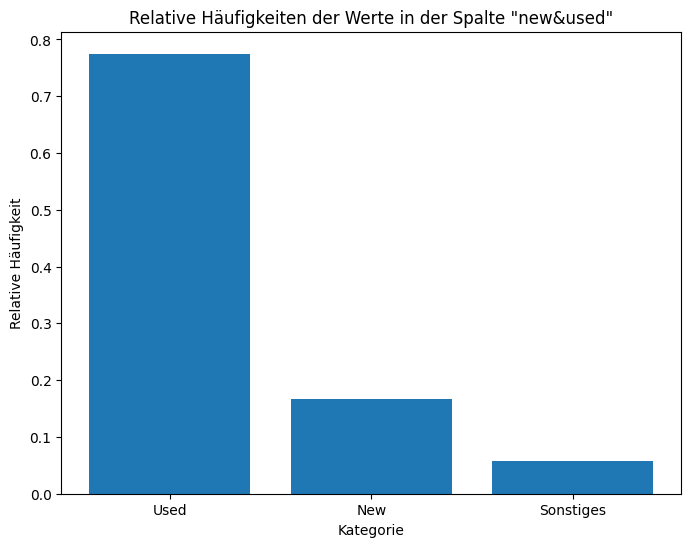

In [118]:
relative_frequencies = df['new&used'].value_counts(normalize=True)

filtered_frequencies = relative_frequencies[relative_frequencies > 0.01]

sum_others = relative_frequencies[relative_frequencies <= 0.01].sum()

filtered_frequencies['Sonstiges'] = sum_others

plt.figure(figsize=(8, 6))
plt.bar(filtered_frequencies.index, filtered_frequencies.values)
plt.xlabel('Kategorie')
plt.ylabel('Relative Häufigkeit')
plt.title('Relative Häufigkeiten der Werte in der Spalte "new&used"')
plt.show()



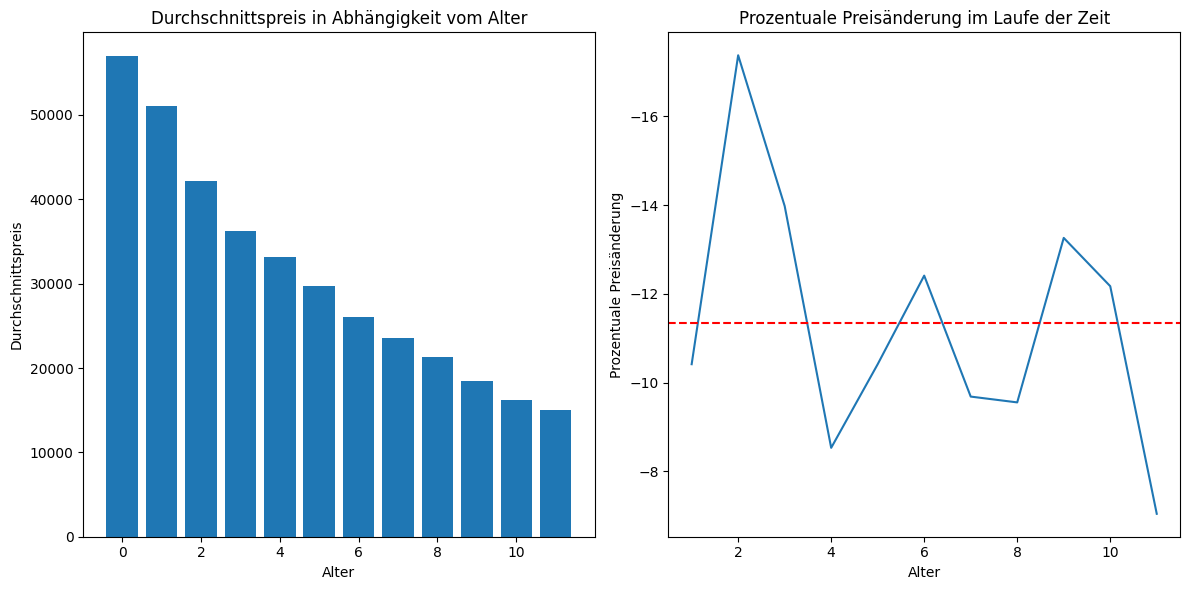

In [119]:
grouped_data = df.groupby('Age')['money'].mean()

# Erstellen der Figure und Axes-Objekte für die Subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Erster Plot: Barplot für den Durchschnittspreis in Abhängigkeit vom Alter
ax1.bar(grouped_data.index, grouped_data.values)
ax1.set_xlabel('Alter')
ax1.set_ylabel('Durchschnittspreis')
ax1.set_title('Durchschnittspreis in Abhängigkeit vom Alter')

# Zweiter Plot: Lineplot für die prozentuale Preisänderung im Laufe der Zeit
price_change_percent = grouped_data.pct_change() * 100
ax2.plot(grouped_data.index, price_change_percent)
ax2.axhline(price_change_percent.mean(), color='red', linestyle='--', label='Durchschnitt')
ax2.set_xlabel('Alter')
ax2.set_ylabel('Prozentuale Preisänderung')
ax2.set_title('Prozentuale Preisänderung im Laufe der Zeit')
ax2.invert_yaxis()

# Platz für den Plot anpassen, damit die Achsentitel nicht überlappen
plt.tight_layout()

# Subplots anzeigen
plt.show()